Author: Elizabeth Luong

Date: 12 March 2025


## Q1

To derive $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma)$,

We will begin with the likelihood function for a linear regression model:

$$p(\textbf{y}  | \textbf{X}, \boldsymbol \beta, \boldsymbol\Sigma)\propto \exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$$

Assuming a Multivariate Normal Prior on $\boldsymbol\beta$:

$$p(\boldsymbol\beta|\boldsymbol\beta_0, \boldsymbol\Sigma_{\beta}) = \mathcal{MVN} (\boldsymbol\beta_0, \boldsymbol\Sigma_{\beta})$$

Which has density:

$$p(\boldsymbol\beta) \propto \text{exp} \left(-\frac{1}{2} (\boldsymbol\beta - \boldsymbol\beta_0)^\top \boldsymbol\Sigma_{\beta}^{-1} (\boldsymbol\beta - \boldsymbol\beta_0) \right)$$

Using Baye's theorem:

$$p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma) \propto p(\textbf{y}  | \textbf{X}, \boldsymbol \beta, \boldsymbol\Sigma) p(\boldsymbol\beta|\boldsymbol\beta_0, \boldsymbol\Sigma_{\beta})$$
 
Expanding the likelihood term:

$$\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$$

Expanding the prior term:

$$\text{exp} \left(-\frac{1}{2} (\boldsymbol\beta - \boldsymbol\beta_0)^\top \boldsymbol\Sigma_{\beta}^{-1} (\boldsymbol\beta - \boldsymbol\beta_0) \right)$$

Multiplying the exponents:

$$\text{exp} \left(-{\frac {1}{2}} \left((\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta}) + (\boldsymbol\beta - \boldsymbol\beta_0)^\top \boldsymbol\Sigma_{\beta}^{-1} (\boldsymbol\beta - \boldsymbol\beta_0)\right) \right) $$

Rearranging the quadratic term in $\boldsymbol \beta$:

$$\text{exp} \left(-\frac{1}{2}\left(\boldsymbol \beta^\top (\textbf{X}^\top \Sigma^{-1}\textbf{X} + \Sigma_{\beta}^{-1}) \boldsymbol \beta - 2 \boldsymbol \beta^\top (\textbf{X}^\top \Sigma^{-1} \textbf{y} + \Sigma_{\beta}^{-1} \boldsymbol \beta_0)\right)\right)$$

Recognizing the kernel of a Multivariate Normal Distribution, we obtain:

$$p(\boldsymbol \beta| \textbf{y}, \textbf{X}, \Sigma) = \mathcal{MVN}(\mu_{\beta}, \Sigma_{\beta}^{*})$$

Where:

$$\Sigma_{\beta}^{*} = (\textbf{X}^\top \Sigma^{-1}\textbf{X} + \Sigma_{\beta}^{-1})^{-1}$$

$$\mu_{\beta} = \Sigma_{\beta}^{*}(\textbf{X}^\top \Sigma^{-1}\textbf{y} + \Sigma_{\beta}^{-1} \boldsymbol \beta_0)$$


To derive $p(\sigma^2|\textbf{y},\textbf{X})$

We assume an inverse-gamma prior on $\sigma^2$:

$$p(\sigma^2) = IG(\alpha, \beta)$$

The likelihood function for $\textbf{y}$ given $\sigma^2$ is:

$$p(\textbf{y}|\boldsymbol \beta, \sigma^2) \propto (\sigma^2)^{-n/2} \text{exp}\left(-\frac{1}{2\sigma^2} (\textbf{y}-\textbf{X}\boldsymbol \beta)^\top (\textbf{y}-\textbf{X}\boldsymbol \beta)\right)$$

The posterior follows an inverse-gamma distribution: 

$$p(\sigma^2|\textbf{y},\textbf{X}) = IG(\alpha^*, \beta^*)$$

Where 

$$\alpha^* = \alpha + \frac{n}{2} $$

$$\beta^* =\beta +\frac{1}{2}(\textbf{y}-\textbf{X}\mu_{\beta})^\top (\textbf{y}-\textbf{X}\mu_{\beta})$$

The log posterior of $\boldsymbol \beta$ with normal prior (ridge regression) is:

$$\text{log} p(\boldsymbol \beta|\textbf{y},\textbf{X}) \propto -\frac{1}{2}(\textbf{y}-\textbf{X}\beta)^\top (\textbf{y}-\textbf{X} \beta) -\frac{1}{2} \lambda \boldsymbol \beta^\top\boldsymbol \beta$$

Which resembles the ridge regression objective:

$$\underset{\beta}{\textrm{min}} ||\textbf{y} -\textbf{X}\boldsymbol\beta||^2 +\lambda ||\boldsymbol\beta||^2$$

For a Laplace prior (lasso regression):

$$p(\boldsymbol\beta)\propto\text{exp}(-\lambda|\boldsymbol \beta|)$$

$$\text{log} p(\boldsymbol\beta|\textbf{y},\textbf{X}) \propto -\frac{1}{2} (\textbf{y} -\textbf{X}\boldsymbol\beta)^\top (\textbf{y} -\textbf{X}\boldsymbol\beta) -\lambda||\boldsymbol\beta||_1$$

Which matches the lasso objective:

$$\underset{\beta}{\textrm{min}} ||\textbf{y} -\textbf{X}\boldsymbol\beta||^2 +\lambda ||\boldsymbol\beta||_1$$

Thus, Bayesian priors inherently regularize the likelihood function.


## Q2

**Dataset Source:** The dataset was originally obtained from Kaggle and manually uploaded to JupyterHub instead of using the Kaggle API.

Citation: Rathod Dharmendra, ["Post College Salaries Dataset"](https://www.kaggle.com/datasets/rathoddharmendra/post-college-salaries)

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv("final-post-college-salaries.csv") 

# Print column names for verification
print("Column Names:", df.columns)

# Remove non-numeric characters (such as dollar signs and commas) and convert to numeric
columns_to_clean = ['Early Career Pay', 'Mid-Career Pay']  # Update based on actual column names

for col in columns_to_clean:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)  # Remove `$` and `,` and convert to float

# Selecting relevant features and target variable
X = df[['Early Career Pay']]  # Predictors
y = df['Mid-Career Pay']  # Target variable

# Standardize features for better numerical stability
X = (X - X.mean()) / X.std()

# Add intercept column
X.insert(0, "Intercept", 1)

# Convert to NumPy arrays
X = X.values
y = y.values

df["Mid-Career Pay"] = df["Mid-Career Pay"].replace('[\$,]', '', regex=True).astype(float)


print("Dataset successfully cleaned and processed.")


Column Names: Index(['Rank', 'Major', 'Degree Type', 'Early Career Pay', 'Mid-Career Pay',
       '% High Meaning'],
      dtype='object')
Dataset successfully cleaned and processed.


In [42]:
import pymc as pm
import arviz as az

# Define Bayesian Linear Regression Model
with pm.Model() as model:
    
    # Priors for regression coefficients (betas)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=X.shape[1])  # Shape matches the number of predictors
    
    # Prior for standard deviation (sigma) with a non-inverse-gamma prior
    sigma = pm.HalfNormal("sigma", sigma=1)  # Half-Cauchy prior for robustness
    
    # Linear regression model
    mu = pm.math.dot(X, betas)  # Xβ
    
    # Likelihood (observed data)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # Sampling
    trace = pm.sample(2000, return_inferencedata=True, target_accept=0.9)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.


In [30]:
# Summary of posterior estimates
az.summary(trace, var_names=["betas", "sigma"])


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-0.009,0.990,-1.833,1.892,0.011,0.011,8129.0,6073.0,1.0
betas[1],-0.006,1.007,-1.827,1.973,0.012,0.011,7582.0,6001.0,1.0
sigma,104380.934,2676.924,99282.551,109422.418,27.746,19.708,9421.0,5771.0,1.0


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

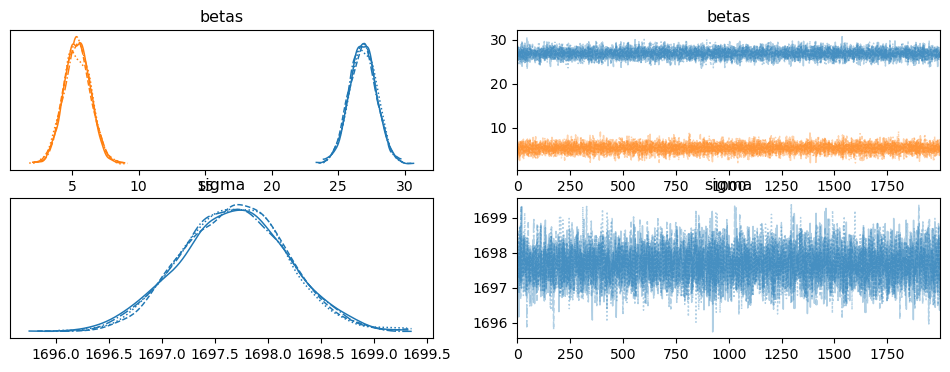

In [43]:
# Plot posterior distributions and sampling diagnostics
az.plot_trace(trace, var_names=["betas", "sigma"])


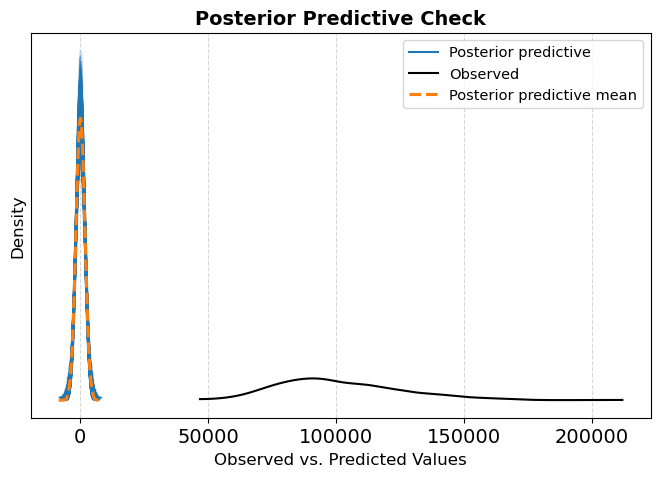

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot posterior predictive check with enhancements
fig, ax = plt.subplots(figsize=(8, 5))  # Set figure size

az.plot_ppc(idata_ppc, ax=ax, mean=True)  # Enable mean line for better readability

# Customize aesthetics
ax.set_title("Posterior Predictive Check", fontsize=14, fontweight='bold')
ax.set_xlabel("Observed vs. Predicted Values", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.5)  # Add a subtle grid

plt.show()


## Q3

In [2]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("final-post-college-salaries.csv")  # Ensure correct filename

# Rename columns for easier access (if necessary)
df.rename(columns={
    'Mid-Career Pay': 'y',
    'Early Career Pay': 'X'  # Example predictor
}, inplace=True)

# Handle missing values by dropping or imputing
df = df.dropna(subset=['y', 'X'])  # Drop rows with missing values
# Convert columns to numeric (removing currency symbols, commas, etc.)
df['y'] = df['y'].replace('[\$,]', '', regex=True).astype(float)
df['X'] = df['X'].replace('[\$,]', '', regex=True).astype(float)


# Standardize X and y for numerical stability
y_mean, y_std = df['y'].mean(), df['y'].std()
X_mean, X_std = df['X'].mean(), df['X'].std()

df['y_scaled'] = (df['y'] - y_mean) / y_std
df['X_scaled'] = (df['X'] - X_mean) / X_std

# Convert data into NumPy arrays
X = df[['X_scaled']].values  # Ensure shape (N,1)
y = df['y_scaled'].values
n = len(y)


In [3]:
np.random.seed(42)
outlier_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
df.loc[outlier_indices, 'y_scaled'] *= np.random.uniform(1.5, 3.0, size=len(outlier_indices))
y = df['y_scaled'].values  # Update y


In [4]:
with pm.Model() as robust_model:

    # Priors for regression coefficients
    β = pm.Normal("β", mu=0, sigma=1)  
    α = pm.Normal("α", mu=0, sigma=1)

    # Global precision
    tau = pm.Gamma("tau", alpha=2, beta=0.1)  # Ensuring strictly positive

    # Degrees of freedom for Student-t
    nu = pm.Gamma("nu", alpha=2, beta=0.1)  # Keep ν > 2 for stability

    # Individual precisions (tau_i) for each data point
    tau_i = pm.Gamma("tau_i", alpha=nu / 2, beta=nu / 2 + 1e-5, shape=n)  # Prevents zero issues

    # Expected value
    mu = α + β * X.flatten()

    # Likelihood (Robust Regression)
    y_obs = pm.Normal("y_obs", mu=mu, tau=tau * tau_i, observed=y)

    # Sampling
    trace_robust = pm.sample(2000, return_inferencedata=True, target_accept=0.95)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α, tau, nu, tau_i]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.


In [5]:
# Summary of Posterior Distributions
az.summary(trace_robust, var_names=["β", "α", "tau", "nu"])


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
β,0.864,0.020,0.826,0.900,0.000,0.000,8789.0,6531.0,1.0
α,-0.020,0.019,-0.056,0.016,0.000,0.000,8538.0,6990.0,1.0
tau,5.367,0.512,4.412,6.326,0.016,0.011,1030.0,2498.0,1.0
nu,3.262,0.429,2.511,4.088,0.017,0.012,640.0,1531.0,1.0


Sampling: [y_obs]


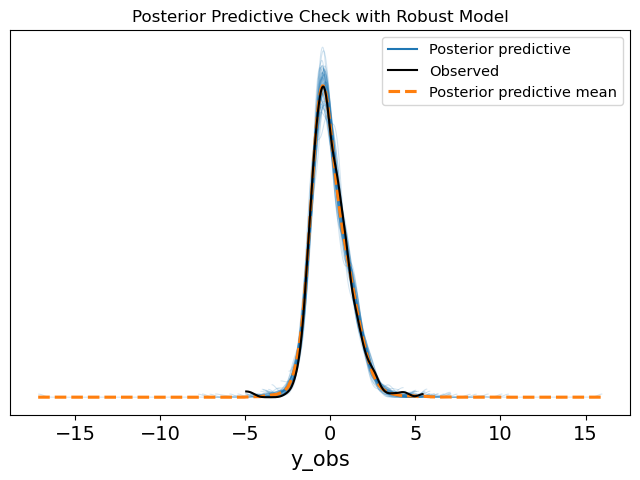

In [6]:
# Generate Posterior Predictive Samples
with robust_model:
    ppc = pm.sample_posterior_predictive(trace_robust, var_names=["y_obs"])

# Convert to InferenceData
idata_ppc = az.convert_to_inference_data(ppc)

# Enhanced Posterior Predictive Plot
fig, ax = plt.subplots(figsize=(8, 5))
az.plot_ppc(idata_ppc, ax=ax, num_pp_samples=50, random_seed=42)
ax.set_title("Posterior Predictive Check with Robust Model")
plt.show()


In [7]:
# Extract tau_i samples and compute means
tau_i_mean = trace_robust.posterior["tau_i"].mean(dim=("chain", "draw"))

# Find suspected outliers (very low precision values)
outlier_threshold = np.percentile(tau_i_mean, 10)  # Bottom 10%
outliers = df.index[tau_i_mean < outlier_threshold]

print("Detected Outliers:", df.loc[outliers])


Detected Outliers:      Rank                                             Major Degree Type  \
0       1                             Petroleum Engineering   Bachelors   
1       2      Operations Research & Industrial Engineering   Bachelors   
2       3  Electrical Engineering & Computer Science (EECS)   Bachelors   
3       4                                Interaction Design   Bachelors   
4       5                                  Building Science   Bachelors   
..    ...                                               ...         ...   
728   729                           Horticulture & Agronomy   Bachelors   
749   750                               Human Services (HS)   Bachelors   
755   756                              Baking & Pastry Arts   Bachelors   
759   760                          Nonprofit Administration   Bachelors   
762   763                                     Metalsmithing   Bachelors   

            X         y % High Meaning  y_scaled  X_scaled  
0     98100.0  2121

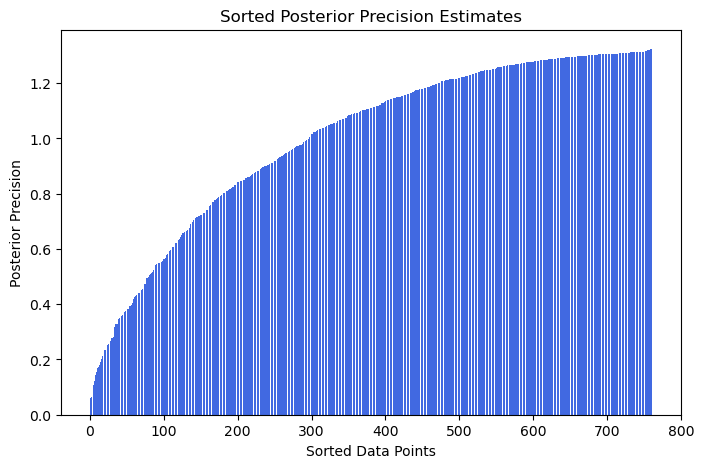

In [9]:
# Convert `D_ii` from xarray to NumPy array
D_ii_values = D_ii.values  # Extracts raw NumPy values

# Now, sort indices correctly
sorted_indices = np.argsort(D_ii_values)

# Re-attempt the plot with fixed indexing
plt.figure(figsize=(8, 5))
plt.bar(range(len(D_ii_values)), D_ii_values[sorted_indices], color="royalblue")
plt.xlabel("Sorted Data Points")
plt.ylabel("Posterior Precision")
plt.title("Sorted Posterior Precision Estimates")
plt.show()
